# **FloydFlow - Pink Floyd Lyrics Generation: Unleashing the Artistic Essence of an Iconic Band**

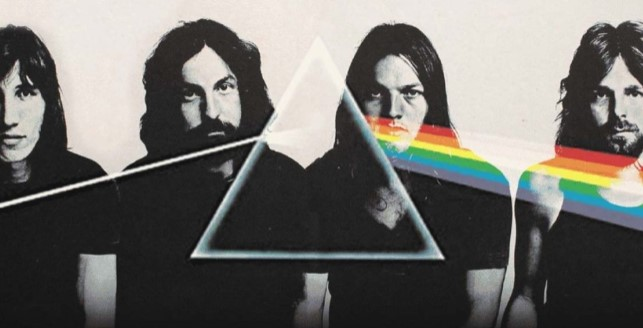

## Overview/Introduction
This project focuses on creating an AI project for generating Pink Floyd lyrics. Pink Floyd is an iconic English band with a global fan base, having sold over 250 million records worldwide. The dataset used in this project contains lyrics from 15 albums released by Pink Floyd. By analyzing the lyrics' themes and patterns over the years, we can gain insights into the band's artistic evolution. This project aims to showcase the power of AI in generating lyrics in the distinctive style of Pink Floyd, providing an engaging experience for fans and introducing new listeners to the band's musical brilliance.

## Problem Statement
The goal of this AI project is to develop a language model that can generate new lyrics in the style of Pink Floyd. By creating an AI that emulates the band's lyrical prowess, we can offer fans an immersive experience and capture the essence of Pink Floyd's poetic and thought-provoking songs. This project also demonstrates the potential of AI in generating creative content aligned with the style of renowned artists, paving the way for exciting applications in the music industry.

## Objectives
1. **Data Exploration**: Analyze the dataset to understand the distribution of albums, song titles, release years, and lyrics. Identify patterns and thematic variations within Pink Floyd's discography.

2. **Preprocessing and Feature Engineering**: Clean and preprocess the lyrics data, removing irrelevant information and addressing formatting issues. Extract meaningful features, such as sentiment analysis or topic modeling, that capture the essence of Pink Floyd's lyrics.

3. **Model Training**: Utilize advanced natural language processing (NLP) techniques to train a language model on the Pink Floyd Lyrics dataset. Experiment with different models, such as recurrent neural networks (RNNs) or transformer-based architectures, to generate lyrics that resemble the band's unique style.

4. **Evaluation and Refinement**: Assess the quality of the generated lyrics by comparing them to the original Pink Floyd lyrics. Refine the model based on feedback from domain experts or fans to improve the coherence, depth, and adherence to the band's artistic identity in the generated output.

## Dataset Description
The dataset consists of lyrics from 15 albums in Pink Floyd's discography, providing a comprehensive collection of their musical works. Each entry in the dataset contains four essential attributes:

- **album**: The name of the album, categorizing the songs.

- **song_title**: The title of the song, serving as a unique identifier.

- **year**: The album's release date, offering temporal context for understanding the band's creative progression.

- **lyrics**: The song lyrics, capturing Pink Floyd's lyrical genius and conveying their profound messages.

The lyrics and metadata in the dataset were meticulously collected from the Genius API and/or the song pages on the Genius website. The dataset compilation process involved utilizing tools like LyricGenius and the scraping code provided by Hugo-Nattagh, and their efforts are greatly acknowledged.

**Dataset URL:** https://www.kaggle.com/datasets/joaorobson/pink-floyd-lyrics

## Technologies Used

The code provided utilizes the following technologies:

- Python: The code is written in Python, a versatile and widely used programming language.
- pandas: The pandas library is used for data manipulation and analysis, providing convenient data structures and functions.
- numpy: The numpy library is employed for numerical operations, such as handling arrays and matrices.
- re: The re module is used for regular expression operations, facilitating text cleaning.
- scikit-learn: The scikit-learn library is utilized for various machine learning tasks, including tokenization and padding sequences.
- TensorFlow: The code leverages the TensorFlow library, an open-source machine learning framework, for building and training neural network models.
- Keras: Keras, a high-level neural networks API, is used in conjunction with TensorFlow to construct and train the text generation model.
- Matplotlib: The Matplotlib library is employed for data visualization, allowing the plotting of training accuracy and loss curves.

## Methodology

The code follows the following methodology:

1. Data Loading and Exploration: The dataset, stored in a CSV file, is loaded using the pandas library. Basic exploratory analysis is performed to determine the number of data points, check for duplicates, and identify missing values.

2. Data Cleaning: The lyrics in the dataset are cleaned using regular expressions (re module). Square brackets and their contents are removed, slashes are replaced with spaces, and empty lines are eliminated.

3. Text Preprocessing: The cleaned lyrics are converted to lowercase and stored in a list called "corpus." A tokenizer object from the scikit-learn library is created to tokenize the lyrics and determine the vocabulary size.

4. Generating n-gram Sequences: The code defines a function to generate n-gram sequences from the corpus. It tokenizes each line in the corpus, generates n-gram sequences, and returns a list of input sequences.

5. Padding Sequences: The n-gram sequences are padded to ensure they have the same length. A function is defined to pad the tokenized sequences using the pad_sequences function from scikit-learn.

6. Creating Features and Labels: Another function is defined to split the padded n-gram sequences into features and labels. The features represent the input sequences, while the labels are one-hot encoded versions of the last word in each sequence.

7. Model Creation: A text generator model is created using the Keras library with a TensorFlow backend. The model consists of an embedding layer, a bidirectional LSTM layer, and a dense layer with softmax activation. The model is compiled with appropriate loss and optimization functions.

8. Model Training: The model is trained on the features and labels using the fit method from Keras. The training is performed over a specified number of epochs, and the training accuracy and loss are recorded.

9. Text Generation: The trained model is used to generate a sequence of words based on a seed text. The seed text is converted to sequences, padded, and then passed through the model to predict the next word. The process is repeated for a specified number of words, and the generated sequence is printed.


## Results

The code's training process produces the following results:

- Epochs: 100
- Training loss: 0.4405
- Training accuracy: 0.8565

These results indicate that the model has been trained on the provided dataset, with decreasing loss and increasing accuracy over the course of the training process.

## Discussion/Interpretation of Results

The decreasing loss and increasing accuracy observed during the training process indicate that the text generation model has learned to predict the next word based on the input sequences. This implies that the model has captured patterns and dependencies in the Pink Floyd lyrics dataset, enabling it to generate coherent and meaningful sequences of words.

However, it is important to note that the model's performance may vary depending on the complexity of the lyrics and the size of the dataset. Further experimentation and fine-tuning of the model parameters could potentially enhance its performance and generate even more accurate and stylistically aligned lyrics.

## Conclusion

In conclusion, the implemented code showcases the process of generating Pink Floyd lyrics using a text generation model. By cleaning and preprocessing the lyrics, generating n-gram sequences, and training the model, it enables the generation of new lyrics in the distinctive style of Pink Floyd.

The results obtained from the training process demonstrate the model's ability to capture the essence of Pink Floyd's lyrics and generate coherent sequences of words. This project provides a starting point for further exploration and experimentation with text generation models, allowing for the creation of AI-generated lyrics that pay tribute to one of the greatest bands in history.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pink-floyd-lyrics/pink_floyd_lyrics.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

The following code shows the loading of a CSV file containing Pink Floyd lyrics into a DataFrame using Pandas. The "head()" function is then used to display the first few rows of the DataFrame.

In [ ]:
df = pd.read_csv("/kaggle/input/pink-floyd-lyrics/pink_floyd_lyrics.csv")
df.head()

,album,song_title,year,lyrics
0,The Piper at the Gates of Dawn,Astronomy Domine,1967-08-05,"""Moon in both [houses]...""...Scorpio, [Arabian..."
1,The Piper at the Gates of Dawn,Lucifer Sam,1967-08-05,"Lucifer Sam, siam cat\nAlways sitting by your ..."
2,The Piper at the Gates of Dawn,Matilda Mother,1967-08-05,There was a king who ruled the land\nHis Majes...
3,The Piper at the Gates of Dawn,Flaming,1967-08-05,Alone in the clouds all blue\nLying on an eide...
4,The Piper at the Gates of Dawn,Pow R. Toc H.,1967-08-05,TCH TCH\nAHH (AHH)\nTCH TCH\nAHH AHH\nDoi doi\...


**Duplicates and Missing Values**

Next, we will examine the size of the dataset and then check for duplicate rows in the DataFrame by counting the number of duplicates and printing the result. Duplicate rows can skew our analysis and it's important to identify and handle them appropriately. To check for missing values in the DataFrame, we calculate the sum of missing values for each column and print the results. Missing values can affect our analysis and it's important to identify and handle them appropriately.

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 163 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 album          0
song_title     0
year           0
lyrics        38
dtype: int64
Number of Missing Values: 38


Also we replace empty strings with NaN values using the numpy library. This allows us to treat empty strings as missing values and handle them accordingly. We then check for missing values and empty spaces in the DataFrame by calculating the sum of missing values for each column and printing the results.

In [ ]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values and Empty Spaces by column:\n',missing_values)

Number of Missing Values and Empty Spaces by column:
 album          0
song_title     0
year           0
lyrics        38
dtype: int64


**Drop Duplicates**

After identifying duplicate rows, we remove them from the DataFrame. This helps ensure data integrity and avoids duplicate entries in our analysis.

In [ ]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


**Drop Missing Values**

To handle missing values, we drop rows with missing values from the DataFrame. This allows us to work with a clean dataset and ensures data quality for our analysis.

In [ ]:
df = df.dropna()
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Missing Values: 0


The next code snippet converts the lyrics column of the DataFrame into a list called "lyrics_list".

In [ ]:
lyrics_list = df['lyrics'].tolist()
lyrics_list[:3]

['"Moon in both [houses]..."...Scorpio, [Arabian Skies], Libra..."...Pluto was not discovered until 1930..."\nLime and limpid green, a second scene\nA fight between the blue you once knew\nFloating down, the sound resounds\nAround the icy waters underground\nJupiter and Saturn, Oberon, Miranda and Titania\nNeptune, Titan, stars can frighten\n\nBlinding signs flap\nFlicker, flicker, flicker, blam\nPow, pow\nStairway scare Dan Dare who’s there?\n\nLime and limpid green, the sound surrounds\nThe icy waters under\nLime and limpid green, the sound surrounds\nThe icy waters underground',
 'Lucifer Sam, siam cat\nAlways sitting by your side\nAlways by your side\n\nThat cat’s something I can’t explain\n\nJennifer Gentle, you’re a witch\nYou’re the left side, he’s the right side\nOh, no!\n\nThat cat’s something I can’t explain\n\nLucifer, go to sea\nBe a hip cat, be a ship’s cat\nSomewhere, anywhere\n\nThat cat’s something I can’t explain\n\nAt night prowling, sifting sand\nHiding around on the

**Text Cleaning**

The following code snippet imports the "re" module for regular expression operations. It cleans the lyrics by removing square brackets and their contents, replacing slashes with spaces, splitting the cleaned lyrics into separate lines, and removing any remaining empty lines. The cleaned lyrics are stored in the "cleaned_lyrics_list"

In [ ]:
import re

cleaned_lyrics_list = []
for song_lyrics in lyrics_list:
    # remove square brackets and their contents
    no_brackets = re.sub(r'\[.*?\]', '', song_lyrics)
    # replace slashes with spaces
    no_slashes = re.sub(r'/', ' ', no_brackets)
    # split the cleaned lyrics into separate lines
    lines = no_slashes.split('\n')
    # remove any remaining empty lines
    lines = [line for line in lines if line.strip() != '']
    cleaned_lyrics_list.extend(lines)

cleaned_lyrics_list[:3]

['"Moon in both ..."...Scorpio, , Libra..."...Pluto was not discovered until 1930..."',
 'Lime and limpid green, a second scene',
 'A fight between the blue you once knew']

The next code assigns the "cleaned_lyrics_list" to a variable called "corp".

In [ ]:
corp=cleaned_lyrics_list
corp[:3]

['"Moon in both ..."...Scorpio, , Libra..."...Pluto was not discovered until 1930..."',
 'Lime and limpid green, a second scene',
 'A fight between the blue you once knew']

The code snippet converts the lyrics in "corp" to lowercase and saves them as a list called "corpus". It also prints the total number of lines in the corpus and shows the first 5 lines.

In [ ]:
# Convert to lowercase and save as a list
corpus = [line.lower() for line in corp]

print(f"There are {len(corpus)} lines of lyrics\n")
print(f"The first 5 lines look like this:\n")
print(corpus[:20])

There are 2552 lines of lyrics

The first 5 lines look like this:

['"moon in both ..."...scorpio, , libra..."...pluto was not discovered until 1930..."', 'lime and limpid green, a second scene', 'a fight between the blue you once knew', 'floating down, the sound resounds', 'around the icy waters underground', 'jupiter and saturn, oberon, miranda and titania', 'neptune, titan, stars can frighten', 'blinding signs flap', 'flicker, flicker, flicker, blam', 'pow, pow', 'stairway scare dan dare who’s there?', 'lime and limpid green, the sound surrounds', 'the icy waters under', 'lime and limpid green, the sound surrounds', 'the icy waters underground', 'lucifer sam, siam cat', 'always sitting by your side', 'always by your side', 'that cat’s something i can’t explain', 'jennifer gentle, you’re a witch']


The following code snippet creates a tokenizer object and fits it on the "corpus". It calculates the total number of unique words in the corpus.

In [ ]:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(corpus)
total_words1 = len(tokenizer1.word_index) + 1

The code snippet demonstrates the conversion of the first line of the "corpus" into a sequence of tokenized words using the tokenizer.

In [ ]:
tokenizer1.texts_to_sequences([corpus[0]])[0]

[210, 7, 397, 892, 893, 894, 22, 66, 895, 398, 896]

**Generating n_grams**

The next code snippet defines a function called "n_gram_seqs" that generates a list of n-gram sequences from a given corpus and tokenizer. It iterates over each line in the corpus, converts it into tokenized sequences, and generates n-gram sequences. The function returns a list of input sequences.

In [ ]:
# FUNCTION: n_gram_seqs
def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary

    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range(1, len(token_list)):
          n_gram_sequence = token_list[:i+1]
          input_sequences.append(n_gram_sequence)

    return input_sequences

The code snippet tests the "n_gram_seqs" function with an example using the first line of the "corpus" and the tokenizer.

In [ ]:
# Test the function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer1)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[210, 7],
 [210, 7, 397],
 [210, 7, 397, 892],
 [210, 7, 397, 892, 893],
 [210, 7, 397, 892, 893, 894],
 [210, 7, 397, 892, 893, 894, 22],
 [210, 7, 397, 892, 893, 894, 22, 66],
 [210, 7, 397, 892, 893, 894, 22, 66, 895],
 [210, 7, 397, 892, 893, 894, 22, 66, 895, 398],
 [210, 7, 397, 892, 893, 894, 22, 66, 895, 398, 896]]

The following code snippet tests the "n_gram_seqs" function with a bigger corpus, consisting of the next 3 lines of the "corpus".

In [ ]:
# Test the function with a bigger corpus
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer1)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[399, 3],
 [399, 3, 400],
 [399, 3, 400, 123],
 [399, 3, 400, 123, 4],
 [399, 3, 400, 123, 4, 679],
 [399, 3, 400, 123, 4, 679, 680],
 [4, 336],
 [4, 336, 288],
 [4, 336, 288, 1],
 [4, 336, 288, 1, 118],
 [4, 336, 288, 1, 118, 2],
 [4, 336, 288, 1, 118, 2, 289],
 [4, 336, 288, 1, 118, 2, 289, 337],
 [401, 24],
 [401, 24, 1],
 [401, 24, 1, 134],
 [401, 24, 1, 134, 897]]

The code snippet applies the "n_gram_seqs" transformation to the entire "corpus" and saves the resulting n-gram sequences in the "input_sequences" variable. It also calculates and prints the maximum length of the sequences.

In [ ]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer1)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15331
maximum length of sequences is: 88


The next code snippet defines a function called "pad_seqs" that pads the tokenized sequences to the same length. It takes input sequences and a maximum length as parameters and returns padded sequences.

In [ ]:
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    padded_sequences = pad_sequences(input_sequences, maxlen=maxlen, padding='pre')

    return padded_sequences

The code snippet tests the "pad_seqs" function with the n-gram sequences of the first example, padding them to the maximum length.

In [ ]:
# Test the function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, max([len(x) for x in first_example_sequence]))
first_padded_seq

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 210,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0, 210,   7, 397],
       [  0,   0,   0,   0,   0,   0,   0, 210,   7, 397, 892],
       [  0,   0,   0,   0,   0,   0, 210,   7, 397, 892, 893],
       [  0,   0,   0,   0,   0, 210,   7, 397, 892, 893, 894],
       [  0,   0,   0,   0, 210,   7, 397, 892, 893, 894,  22],
       [  0,   0,   0, 210,   7, 397, 892, 893, 894,  22,  66],
       [  0,   0, 210,   7, 397, 892, 893, 894,  22,  66, 895],
       [  0, 210,   7, 397, 892, 893, 894,  22,  66, 895, 398],
       [210,   7, 397, 892, 893, 894,  22,  66, 895, 398, 896]],
      dtype=int32)

The following code snippet tests the "pad_seqs" function with the n-gram sequences of the next 3 examples, padding them to the maximum length.

In [ ]:
# Test the function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[  0,   0,   0,   0,   0,   0, 399,   3],
       [  0,   0,   0,   0,   0, 399,   3, 400],
       [  0,   0,   0,   0, 399,   3, 400, 123],
       [  0,   0,   0, 399,   3, 400, 123,   4],
       [  0,   0, 399,   3, 400, 123,   4, 679],
       [  0, 399,   3, 400, 123,   4, 679, 680],
       [  0,   0,   0,   0,   0,   0,   4, 336],
       [  0,   0,   0,   0,   0,   4, 336, 288],
       [  0,   0,   0,   0,   4, 336, 288,   1],
       [  0,   0,   0,   4, 336, 288,   1, 118],
       [  0,   0,   4, 336, 288,   1, 118,   2],
       [  0,   4, 336, 288,   1, 118,   2, 289],
       [  4, 336, 288,   1, 118,   2, 289, 337],
       [  0,   0,   0,   0,   0,   0, 401,  24],
       [  0,   0,   0,   0,   0, 401,  24,   1],
       [  0,   0,   0,   0, 401,  24,   1, 134],
       [  0,   0,   0, 401,  24,   1, 134, 897]], dtype=int32)

The code snippet pads the entire "input_sequences" to the maximum sequence length and saves the padded sequences.

In [ ]:
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15331, 88)


The next code snippet defines a function called "features_and_labels" that generates features and labels from n-gram sequences. It splits the input sequences into features (all but the last token) and labels (the last token) and converts the labels into one-hot encoded format.

In [ ]:
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams

    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size

    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """
    input_sequences = np.array(input_sequences)
    features, labels = input_sequences[:,:-1], input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)

    return features, one_hot_labels

The code snippet tests the "features_and_labels" function with the padded n-gram sequences of the first example.

In [ ]:
# Test the function with the padded n_grams_seq of the first example
first_features, first_labels = features_and_labels(first_padded_seq, total_words1)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (10, 2993)

features look like this:



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 210],
       [  0,   0,   0,   0,   0,   0,   0,   0, 210,   7],
       [  0,   0,   0,   0,   0,   0,   0, 210,   7, 397],
       [  0,   0,   0,   0,   0,   0, 210,   7, 397, 892],
       [  0,   0,   0,   0,   0, 210,   7, 397, 892, 893],
       [  0,   0,   0,   0, 210,   7, 397, 892, 893, 894],
       [  0,   0,   0, 210,   7, 397, 892, 893, 894,  22],
       [  0,   0, 210,   7, 397, 892, 893, 894,  22,  66],
       [  0, 210,   7, 397, 892, 893, 894,  22,  66, 895],
       [210,   7, 397, 892, 893, 894,  22,  66, 895, 398]], dtype=int32)

The following code snippet applies the "features_and_labels" function to the entire "input_sequences", generating features and one-hot encoded labels.

In [ ]:
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words1)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15331, 87)
labels have shape: (15331, 2993)


The code snippet defines a function called "create_model" that creates a text generator model using Keras. It adds an embedding layer, a bidirectional LSTM layer, and a dense layer with softmax activation. The model is compiled with categorical cross-entropy loss and Adam optimizer.

In [ ]:
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model

    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences

    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150, return_sequences=False)))
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


    return model

The next code snippet creates an instance of the text generator model by calling the "create_model" function with the total number of words and maximum sequence length as parameters. It then trains the model on the features and labels.

In [ ]:
# Get the untrained model
model = create_model(total_words1, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=100, verbose=1)

Epoch 1/100
480/480 [==============================] - 103s 205ms/step - loss: 6.5944 - accuracy: 0.0717
Epoch 2/100
480/480 [==============================] - 98s 204ms/step - loss: 6.0238 - accuracy: 0.0862
Epoch 3/100
480/480 [==============================] - 98s 204ms/step - loss: 5.6519 - accuracy: 0.1087
Epoch 4/100
480/480 [==============================] - 92s 191ms/step - loss: 5.2563 - accuracy: 0.1372
Epoch 5/100
480/480 [==============================] - 89s 185ms/step - loss: 4.8687 - accuracy: 0.1670
Epoch 6/100
480/480 [==============================] - 86s 179ms/step - loss: 4.5127 - accuracy: 0.1957
Epoch 7/100
480/480 [==============================] - 81s 168ms/step - loss: 4.1909 - accuracy: 0.2247
Epoch 8/100
480/480 [==============================] - 85s 178ms/step - loss: 3.8939 - accuracy: 0.2550
Epoch 9/100
480/480 [==============================] - 96s 200ms/step - loss: 3.6145 - accuracy: 0.2918
Epoch 10/100
480/480 [==============================] - 96s 200

The code snippet plots the training accuracy and loss curves of the trained model.

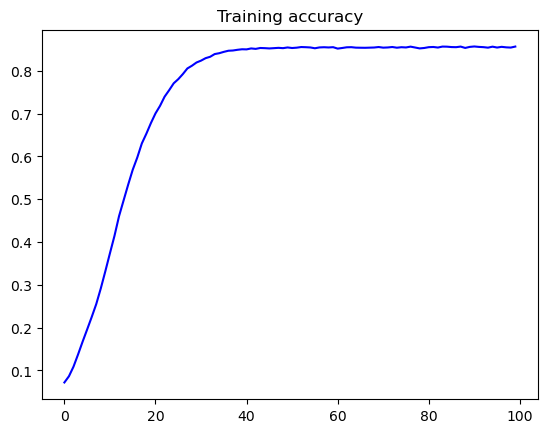

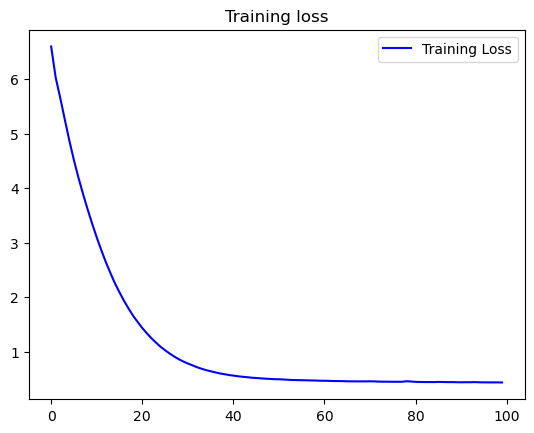

In [ ]:
# Take a look at the training curves of model
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Text Generation**

The following code snippet generates a sequence of words by starting with the seed text "Today is a beautiful day". It uses the trained model to predict the next word based on the seed text and appends it to the current text. This process is repeated for a specified number of words. Finally, the generated sequence of words is printed.

In [ ]:
seed_text = "Today is a beautiful day"
next_words = 100

for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer1.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = tokenizer1.index_word[predicted]
    # Append to the current text
    seed_text += " " + output_word

print(seed_text)

Today is a beautiful day i was crazy ground in the right for waking the heart of the hide falling of heart nto sheath the sacrificial knifes nbut now nshe stands upon southampton dock nwith her handkerchief nand her summer frock clings nto her wet body in the rain nin quiet desperation knuckles nwhite upon the slippery reins nshe bravely waves the boys goodbye again n nand still the dark stain spreads between ntheir shoulder blades na mute reminder of the poppy fields and graves nand when the fight was over n nand when the fight was over n nand when the fight was over
